In [1]:
import geopandas as gpd
import shapely
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
province_gdf = gpd.read_file('osmconvert/adm_boundary/IDN_adm1_v02.shp')

In [3]:
province_gdf['NAME_1'] = province_gdf['NAME_1'].str.lower()

In [4]:
gini_df = pd.read_excel('bps_gini.xlsx')
gini_df = gini_df.iloc[4:, np.r_[0, 61:71]]
gini_df.columns = ['province', 'y2016_1', 'y_2016_2', 'y_2017_1', 'y_2017_2', 'y_2018_1', 'y_2018_2', 'pdrb2018',\
                  'pop2018', 'pdrbcapita2018', 'regIncome2018']
gini_df['gini_avrg'] = gini_df[gini_df.columns[1:-4]].mean(axis=1)
gini_df['province'] = gini_df['province'].str.lower()

In [6]:
set(province_gdf['NAME_1']) == set(gini_df['province'])

True

In [9]:
gini_df = gini_df.sort_values('province')
gini_df.reset_index(inplace=True)

province_gdf = province_gdf.sort_values('NAME_1')
province_gdf.reset_index(inplace=True)

In [10]:
province_gdf['gini'] = gini_df['gini_avrg'].astype(float)
province_gdf['pdrb2018'] = gini_df['pdrb2018'].astype(float)
province_gdf['pop2018'] = gini_df['pop2018'].astype(float)
province_gdf['pdrbcapita2018'] = gini_df['pdrbcapita2018'].astype(float)
province_gdf['regIncome2018'] = gini_df['regIncome2018'].astype(float)

In [11]:
province_gdf['rel_capacity'] = province_gdf['regIncome2018']*1000 / province_gdf['dmg_total']

In [13]:
from scipy import stats

In [15]:
#a naive function
def calc_rank_cluster(x, nr_class=4):
    pct = [stats.percentileofscore(x, a, 'rank', ) for a in x]
    
    div = int(100/nr_class)
    
    clusters = []
    
    for i in pct:
        r = 1
        cum = div
        while i > cum:
            cum += div
            r += 1
        clusters.append(r)
        
    return clusters, pct

In [16]:
province_gdf['cluster'], pct = calc_rank_cluster(province_gdf['rel_capacity'])

#lower percentile or lower cluster identity = lower relative capacity!

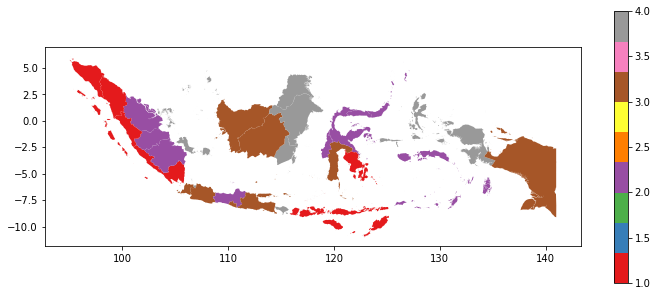

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

province_gdf.plot(column='cluster', cmap='Set1', legend=True,ax=ax)
plt.show()

In [87]:
province_gdf.to_file('osmconvert/adm_boundary/IDN_adm1_v03.shp')